In [40]:
import os
import cv2
import imutils
import easyocr
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

### Load Model & Predict Image


In [34]:
# Load a model
model = YOLO("D:/Coding/Projects/number-plate-recognition/runs/detect/train24/weights/best.onnx")

In [42]:
# Load image
path_image = "D:/Coding/Projects/number-plate-recognition/data/K2_AB2761HX.jpg"
img = cv2.imread(path_image)
img_size = img.shape[0:2]

# Predict plat
results = model(path_image, save=True, conf=0.1)
results


image 1/1 D:\Coding\Projects\number-plate-recognition\data\K2_AB2761HX.jpg: 640x640 2 plat-nomors, 161.4ms
Speed: 5.0ms preprocess, 161.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to d:\Coding\Projects\number-plate-recognition\runs\detect\predict6


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'plat-nomor'}
 orig_img: array([[[153, 158, 157],
         [152, 157, 156],
         [152, 157, 156],
         ...,
         [ 53,  45,  45],
         [ 47,  38,  41],
         [ 59,  50,  53]],
 
        [[154, 159, 158],
         [152, 157, 156],
         [152, 157, 156],
         ...,
         [ 45,  37,  37],
         [ 31,  23,  24],
         [ 35,  26,  29]],
 
        [[154, 159, 158],
         [152, 157, 156],
         [153, 158, 157],
         ...,
         [ 58,  50,  50],
         [ 59,  51,  52],
         [ 47,  39,  40]],
 
        ...,
 
        [[141, 155, 161],
         [137, 151, 157],
         [136, 150, 156],
         ...,
         [114, 126, 132],
         [112, 124, 128],
         [106, 118, 122]],
 
        [[138, 152, 158],
         [137, 151, 157],
         [138, 152, 158],
         ...,
         [109, 123, 129],

### Ambil Crop Hasil Predict

PLAT-NOMOR


True

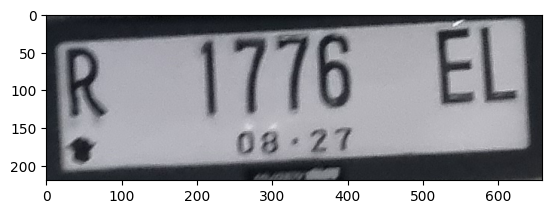

In [36]:
# Load real image
img = cv2.imread(path_image)
img_size = img.shape[0:2]

# Predict plat
results = results[0]
x1, y1, x2, y2 = None, None, None, None
# Draw rectangle
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    cropped_image = img[int(y1):int(y2), int(x1):int(x2)]
    print(results.names[int(class_id)].upper())

# Show image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Simpan gambar yang telah di-crop
cv2.imwrite("hasil_cropped.jpg", cropped_image)

### OCR

In [37]:
# Melakukan text recognition dengan easy ocr
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[19, 41], [87, 41], [87, 143], [19, 143]], 'R', 0.9969258129503942),
 ([[179, 7], [427, 7], [427, 153], [179, 153]], '1776', 0.7981247999523466),
 ([[510, 8], [640, 8], [640, 132], [510, 132]], 'EL', 0.9996882118529753),
 ([[246, 140], [415, 140], [415, 195], [246, 195]],
  '08.27',
  0.9917188260255432)]

In [38]:
# Define Font
font = cv2.FONT_HERSHEY_SIMPLEX     # Jenis font
font_scale = 3                      # Skala font
font_thickness = 5                  # Ketebalan font
font_color = (0, 255, 0)            # Warna biru (BGR)

### Draw Result OCR

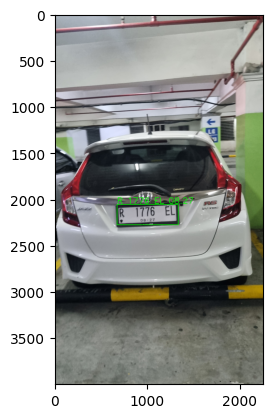

In [39]:
text_to_write = " ".join([res[1] for res in result])

# Gambar rectangle
imgDraw = cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), font_color, font_thickness)  # font_color adalah warna merah

# Tulis kata
imgDraw2 = cv2.putText(imgDraw, text_to_write, (int(x1), int(y1) - 10), font, font_scale, font_color, font_thickness)  # font_color adalah warna merah

# Simpan gambar yang telah dimodifikasi
cv2.imwrite("hasil_ocr.jpg", imgDraw2)
plt.imshow(cv2.cvtColor(imgDraw2, cv2.COLOR_BGR2RGB))